# IRIS FLOWER CLASSIFICATION

The dataset contains the following attributes
1. sepal length
2. sepal width 
3. petal length
4. petal width
5. species

Using these attributes we are going to create a model that can predict the species of flower based on measurements.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Loading the dataset

In [2]:
fl = pd.read_csv('IRIS.csv')
fl.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
fl.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
fl.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
fl.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
fl['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
fl.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visulaisation of dataset

<Axes: >

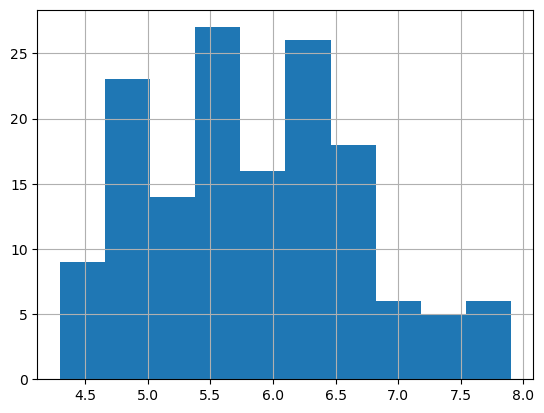

In [9]:
fl['sepal_length'].hist()

<Axes: >

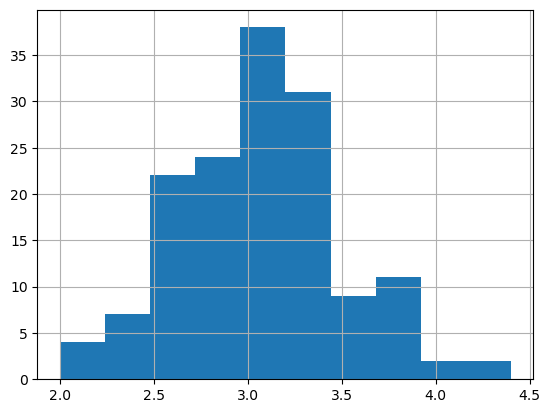

In [10]:
fl['sepal_width'].hist()

<Axes: >

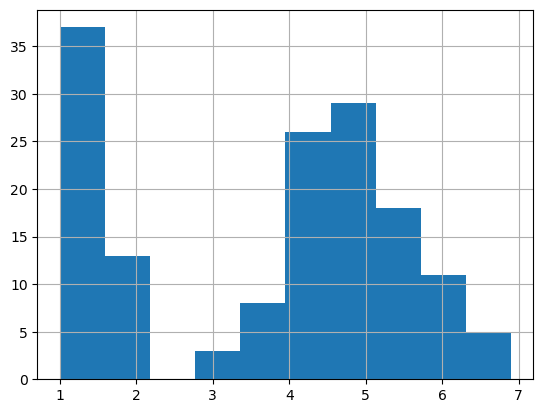

In [11]:
fl['petal_length'].hist()

<Axes: >

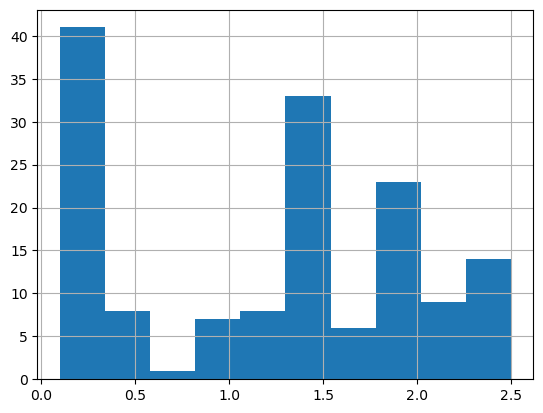

In [12]:
fl['petal_width'].hist()

In [13]:
#scatterplot
colors = ['red','yellow','purple']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

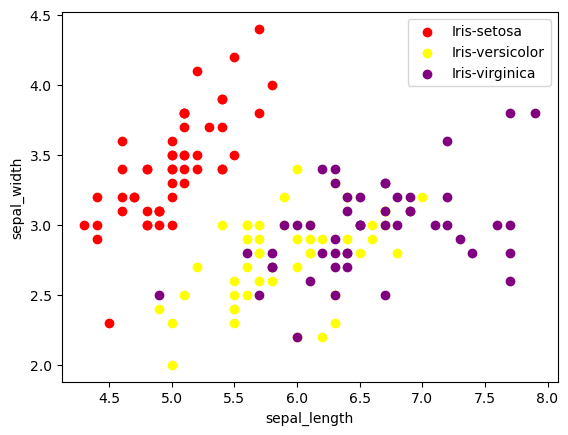

In [14]:
for i in range(3):
    a = fl[fl['species'] == species[i]]
    plt.scatter(a['sepal_length'], a['sepal_width'], c = colors[i], label = species[i])
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend()

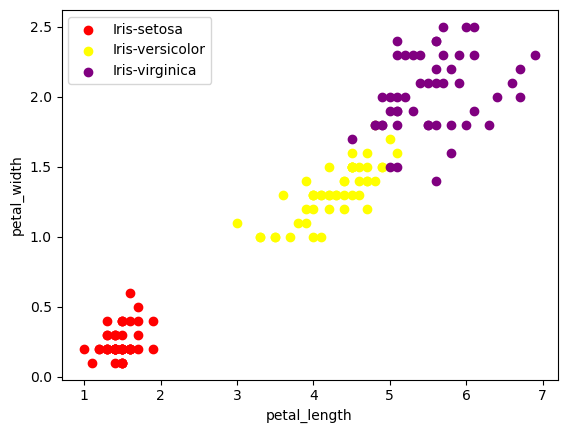

In [15]:
for i in range(3):
    a = fl[fl['species'] == species[i]]
    plt.scatter(a['petal_length'], a['petal_width'], c = colors[i], label = species[i])
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()

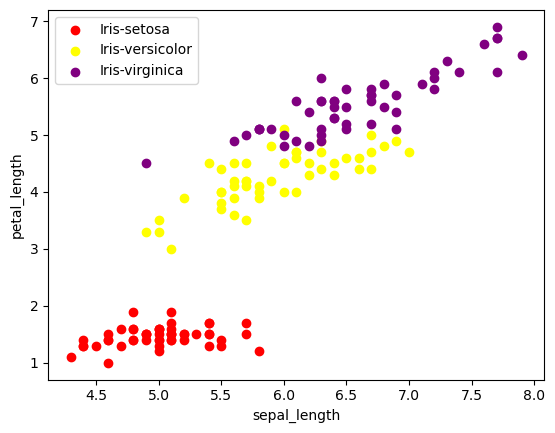

In [16]:
for i in range(3):
    a = fl[fl['species'] == species[i]]
    plt.scatter(a['sepal_length'], a['petal_length'], c = colors[i], label = species[i])
    plt.xlabel('sepal_length')
    plt.ylabel('petal_length')
    plt.legend()

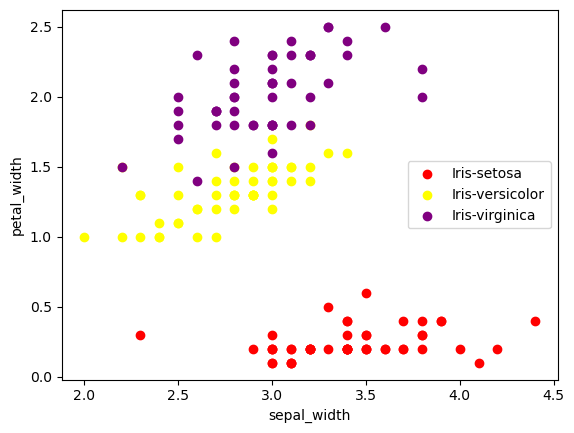

In [17]:
for i in range(3):
    a = fl[fl['species'] == species[i]]
    plt.scatter(a['sepal_width'], a['petal_width'], c = colors[i], label = species[i])
    plt.xlabel('sepal_width')
    plt.ylabel('petal_width')
    plt.legend()

# Label Encoder

It is a simple and effective way to convert categorical variables into numerical form.

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
#species column is converted from string to float values
fl['species'] = le.fit_transform(fl['species'])
fl.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Correlation of matrix

A correlation matrix is a table containing correlation coefficients for many variables. Each cell in the table represents the correlation between two variables. The value might range between -1 and 1.

In [20]:
fl.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

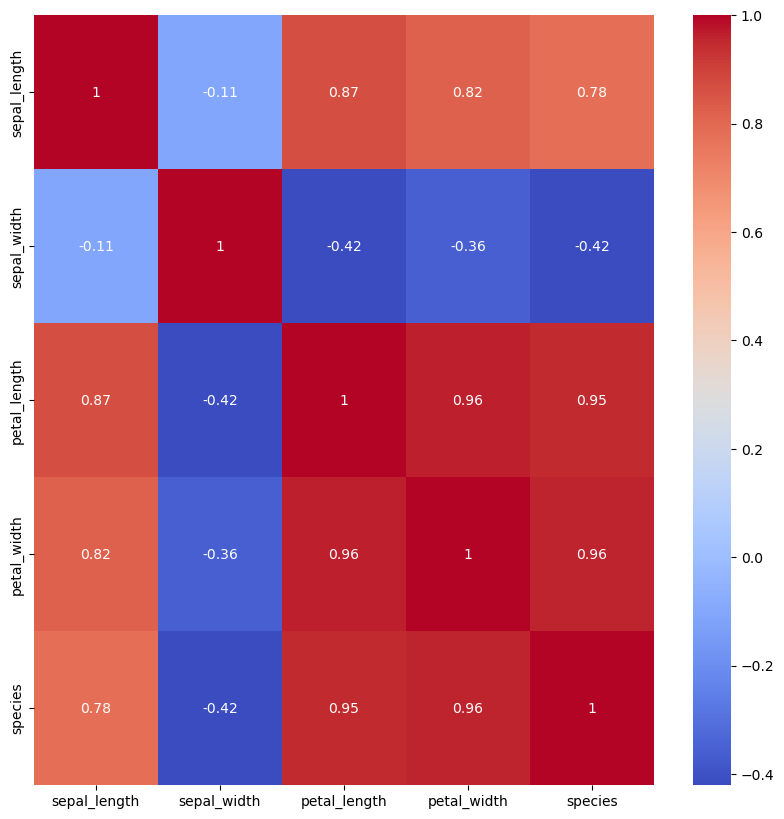

In [21]:
corr = fl.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot = True,ax=ax,cmap='coolwarm')

# Train the model

In [22]:
from sklearn.model_selection import train_test_split
x=fl.drop(columns=['species'])
y=fl['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

# Accuracy and Prediction of model

In [24]:
 model.score(x,y)

0.9733333333333334

In [25]:
expected = y
predicted =model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
#0 - iris setosa
#1 - iris versicolor
#2 -irsis virginica